# DATA SOURCE:
+ https://github.com/nflverse/nfldata
+ https://github.com/nflverse/nflverse-data/releases

# Comparison:
+ https://www.nfeloapp.com/games/nfl-model-performance/#:~:text=About,models%20available%20on%20the%20internet

# Import

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import json
from datetime import datetime
from sklearn.metrics import accuracy_score

import functions

# Set the display of float numbers to x decimals (this only change the way the values are displayed and not the values itself)
# To reset this use:
# pd.reset_option("display.float_format")
pd.options.display.float_format = "{:.3f}".format

In [2]:
path = os.getcwd()

df = pd.read_csv(path + "/data/raw/games_2023.csv", sep=",")
# Set max columns to 200, so df.head() shows all(max 200) columns    
pd.set_option("display.max_columns", 200) 
# Rename qb columns
df = df.rename(columns={"away_qb_name": "away_qb", "home_qb_name": "home_qb"})
df = df.loc[df["season"] > 1999]
df = df.reset_index(drop=True)
# Display head so we can see what we are working with and make sure the import went right
display(df.head())

,game_id,season,game_type,week,gameday,weekday,gametime,away_team,away_score,home_team,home_score,location,result,total,overtime,old_game_id,gsis,nfl_detail_id,pfr,pff,espn,ftn,away_rest,home_rest,away_moneyline,home_moneyline,spread_line,away_spread_odds,home_spread_odds,total_line,under_odds,over_odds,div_game,roof,surface,temp,wind,away_qb_id,home_qb_id,away_qb,home_qb,away_coach,home_coach,referee,stadium_id,stadium
0,2000_01_SF_ATL,2000.000,REG,1.000,2000-09-03,Sunday,13:00,SF,28.000,ATL,36.000,Home,8.000,64.000,0.000,2000090310.000,998.000,NaN,200009030atl,NaN,200903001.000,NaN,7.000,7.000,NaN,NaN,6.500,NaN,NaN,46.500,NaN,NaN,1.000,dome,astroturf,NaN,NaN,00-0005755,00-0002876,Jeff Garcia,Chris Chandler,Steve Mariucci,Dan Reeves,Walt Coleman,ATL00,Georgia Dome
1,2000_01_JAX_CLE,2000.000,REG,1.000,2000-09-03,Sunday,13:00,JAX,27.000,CLE,7.000,Home,-20.000,34.000,0.000,2000090306.000,994.000,NaN,200009030cle,NaN,200903005.000,NaN,7.000,7.000,NaN,NaN,-10.500,NaN,NaN,38.500,NaN,NaN,1.000,outdoors,grass,78.000,6.000,00-0002110,00-0003535,Mark Brunell,Tim Couch,Tom Coughlin,Chris Palmer,Bernie Kukar,CLE00,Cleveland Browns Stadium
2,2000_01_IND_KC,2000.000,REG,1.000,2000-09-03,Sunday,13:00,IND,27.000,KC,14.000,Home,-13.000,41.000,0.000,2000090305.000,993.000,NaN,200009030kan,NaN,200903012.000,NaN,7.000,7.000,NaN,NaN,-3.500,NaN,NaN,44.000,NaN,NaN,0.000,outdoors,grass,90.000,5.000,00-0010346,00-0006300,Peyton Manning,Elvis Grbac,Jim Mora,Gunther Cunningham,Larry Nemmers,KAN00,Arrowhead Stadium
3,2000_01_CHI_MIN,2000.000,REG,1.000,2000-09-03,Sunday,13:00,CHI,27.000,MIN,30.000,Home,3.000,57.000,0.000,2000090303.000,991.000,NaN,200009030min,NaN,200903016.000,NaN,7.000,7.000,NaN,NaN,4.500,NaN,NaN,46.500,NaN,NaN,1.000,dome,astroturf,NaN,NaN,00-0011044,00-0003739,Cade McNown,Daunte Culpepper,Dick Jauron,Dennis Green,Ed Hochuli,MIN00,Hubert H. Humphrey Metrodome
4,2000_01_TB_NE,2000.000,REG,1.000,2000-09-03,Sunday,13:00,TB,21.000,NE,16.000,Home,-5.000,37.000,0.000,2000090312.000,1000.000,NaN,200009030nwe,NaN,200903017.000,NaN,7.000,7.000,NaN,NaN,-3.000,NaN,NaN,36.000,NaN,NaN,0.000,outdoors,grass,71.000,5.000,00-0009266,00-0001361,Shaun King,Drew Bledsoe,Tony Dungy,Bill Belichick,Jeff Triplette,BOS99,Foxboro Stadium


In [3]:
# Load Model
model_xgb = joblib.load(path + "/models/model_xgb.pkl")

In [4]:
# After some testing, this are the best settings for feature engineering
df_eng = functions.feature_eng(df, alpha=0.7, week_change=1)
X_train, y_train, X_test, y_test = functions.train_test_split(df_eng, split_season=2023)
X_train, X_test = functions.pipeline(X_train, X_test)

# Feature Importance

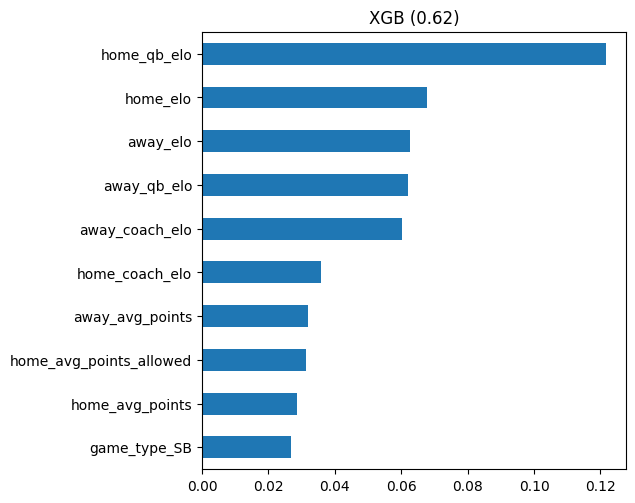

In [5]:
fig, ax = plt.subplots(figsize=(8, 8))
fig.tight_layout(pad=12)

# Predict Target Test
y_test_pred = model_xgb.predict(X_test)
# Print Metrics
acc_xgb = accuracy_score(y_test, y_test_pred)

fi_xgb = model_xgb.feature_importances_
feature_importance_rf = pd.Series(fi_xgb, index=X_train.columns)
feature_importance_rf.sort_values(ascending=False)[:10].plot(kind="barh", title="XGB ({:.2f})".format(acc_xgb), ax=ax).invert_yaxis()

plt.savefig(path + "/media/Feature_Importances_Engineered_XGB.jpg", dpi=150)

# Predicted Result

# 2024

In [6]:
# Load last week of the season to get the results of all 2024 games played
# Superbowl: Week = 22
season = 2024
week = 22

df_temp = pd.read_csv(path + f"/data/raw/games_24_{week:02}_result.csv")
print(f"Loaded file: {f"games_24_{week:02}_result.csv"}\n")

# Manipulate DataFrame
df_temp = df_temp.loc[df_temp["season"] >= 2000, :]
df_temp = df_temp.reset_index(drop=True)
df_temp = df_temp.rename(columns={"away_qb_name": "away_qb", "home_qb_name": "home_qb"})
df_temp["home_win"] = df_temp["result"].apply(lambda x: 1 if x > 0 else 0)

Loaded file: games_24_22_result.csv



In [7]:
def weekly_prediction_xgb(week=1, eval=False, proba=False):
      """
      Returns prediction for the chosen week.

      Args:
      week(int): Sets the week for the prediction
      eval(bool): If eval == False, just display prediction. If eval == True, return prediction array

      Returns:
      temp_target_test_pred (numpy.ndarray): Prediction array for chosen week.

      """
      if not isinstance(week, int):
            return print(f"Error: Variable 'week' must be of type int, not {type(week)}")
            
      try:
            temp_df = pd.read_csv(path + f"/data/raw/games_24_{week:02}.csv")
            if eval == True:
                  print(f"Loaded file: {f"games_24_{week:02}.csv"}\n")

            # Manipulate DataFrame
            temp_df = temp_df.loc[temp_df["season"] >= 2000, :]
            temp_df = temp_df.reset_index(drop=True)
            temp_df = temp_df.rename(columns={"away_qb_name": "away_qb", "home_qb_name": "home_qb"})

            # Feature Engineering
            temp_df_eng = functions.feature_eng(temp_df, alpha=0.7, week_change=1)
            temp_X_train, temp_target_train, temp_X_test, temp_target_test = functions.train_test_split(temp_df_eng, split_season=2024, split_week=week)
            temp_X_train, temp_X_test = functions.pipeline(temp_X_train, temp_X_test)

            # Predicting
            temp_target_test_proba = model_xgb.predict_proba(temp_X_test)
            temp_target_test_pred = model_xgb.predict(temp_X_test)

            # Insert predicitions and format ouput
            temp_df_pred = temp_df.loc[(temp_df["season"] == season) & (temp_df["week"] >= week)].copy()
            temp_df_pred.loc[:, ["away_%"]] = temp_target_test_proba[:, 0]
            temp_df_pred.loc[:, ["home_%"]] = temp_target_test_proba[:, 1]
            temp_df_pred["away_%"] = (temp_df_pred["away_%"] * 100).map("{:.2f}%".format)
            temp_df_pred["home_%"] = (temp_df_pred["home_%"] * 100).map("{:.2f}%".format)
            temp_df_pred["home_win"] = temp_df_pred.apply(lambda row: 1 if row["home_%"] > row["away_%"] else 0, axis=1)
            temp_df_pred = temp_df_pred[["season", "week", "weekday", "game_type", "away_team", "home_team", "away_%", "home_%", "home_win"]]
            
            if eval == True:
                  print("-"*10 + f"Prediction week {week:02}" + "-"*10)
                  display(temp_df_pred.loc[temp_df_pred["week"] == week])

            num_games = len(temp_df_pred.loc[temp_df_pred["week"] == week])
            if proba == True:
                  return temp_target_test_proba[:num_games]
            else:
                  return temp_target_test_pred[:num_games]
                                          
      except FileNotFoundError:
            return print(f"File not found: {f"games_24_{week:02}.csv"}")

In [8]:
results_pred_xgb = []
for i in range(1, week+1):
    results_pred_xgb.append(weekly_prediction_xgb(i, True))
    
results_pred_xgb = [arr.tolist() for arr in results_pred_xgb]
results_pred_xgb_full = np.concatenate(results_pred_xgb)

Loaded file: games_24_01.csv

----------Prediction week 01----------


,season,week,weekday,game_type,away_team,home_team,away_%,home_%,home_win
6447,2024,1,Thursday,REG,BAL,KC,42.95%,57.05%,1
6448,2024,1,Friday,REG,GB,PHI,41.84%,58.16%,1
6449,2024,1,Sunday,REG,PIT,ATL,48.03%,51.97%,1
6450,2024,1,Sunday,REG,ARI,BUF,21.25%,78.75%,1
6451,2024,1,Sunday,REG,TEN,CHI,48.57%,51.43%,1
6452,2024,1,Sunday,REG,NE,CIN,26.81%,73.19%,1
6453,2024,1,Sunday,REG,HOU,IND,54.48%,45.52%,0
6454,2024,1,Sunday,REG,JAX,MIA,40.08%,59.92%,1
6455,2024,1,Sunday,REG,CAR,NO,33.29%,66.71%,1
6456,2024,1,Sunday,REG,MIN,NYG,44.20%,55.80%,1


Loaded file: games_24_02.csv

----------Prediction week 02----------


,season,week,weekday,game_type,away_team,home_team,away_%,home_%,home_win
6463,2024,2,Thursday,REG,BUF,MIA,54.75%,45.25%,0
6464,2024,2,Sunday,REG,LV,BAL,27.20%,72.80%,1
6465,2024,2,Sunday,REG,LAC,CAR,60.73%,39.27%,0
6466,2024,2,Sunday,REG,NO,DAL,33.35%,66.65%,1
6467,2024,2,Sunday,REG,TB,DET,37.00%,63.00%,1
6468,2024,2,Sunday,REG,IND,GB,50.67%,49.33%,0
6469,2024,2,Sunday,REG,CLE,JAX,50.57%,49.43%,0
6470,2024,2,Sunday,REG,SF,MIN,55.96%,44.04%,0
6471,2024,2,Sunday,REG,SEA,NE,53.65%,46.35%,0
6472,2024,2,Sunday,REG,NYJ,TEN,50.17%,49.83%,0


Loaded file: games_24_03.csv



KeyboardInterrupt: 

In [ ]:
results = []

for i in range(1, week+1):
    temp_list = []
    df_results_temp = pd.read_csv(path + f"/data/raw/games_24_{i:02}_result.csv")
    df_results_temp = df_results_temp.loc[(df_results_temp["season"] == 2024) & (df_results_temp["week"] == i)]
    
    temp_list = [1 if j > 0 else 0 for j in df_results_temp["result"]]
        
    results.append(temp_list)
    
results_full = np.concatenate(results)

In [ ]:
mean_acc_xgb = []
mean_acc_xgb_overall = []

for i in range(1, week+1):
    print(f"Week: {i}")
    mean_acc_xgb.append(accuracy_score(results[i-1], results_pred_xgb[i-1]))
    mean_acc_xgb_overall.append(np.mean(accuracy_score(np.concatenate(results[:i]), np.concatenate(results_pred_xgb[:i]))).tolist())
    print(f"Weekly mean: {mean_acc_xgb[i-1]}")
    print(f"Overall mean: {mean_acc_xgb_overall[i-1]}\n")

Week: 1
Weekly mean: 0.6875
Overall mean: 0.6875

Week: 2
Weekly mean: 0.5625
Overall mean: 0.625

Week: 3
Weekly mean: 0.5625
Overall mean: 0.6041666666666666

Week: 4
Weekly mean: 0.75
Overall mean: 0.640625

Week: 5
Weekly mean: 0.7142857142857143
Overall mean: 0.6538461538461539

Week: 6
Weekly mean: 0.6428571428571429
Overall mean: 0.6521739130434783

Week: 7
Weekly mean: 0.6666666666666666
Overall mean: 0.6542056074766355

Week: 8
Weekly mean: 0.625
Overall mean: 0.6504065040650406

Week: 9
Weekly mean: 0.6
Overall mean: 0.644927536231884

Week: 10
Weekly mean: 0.7142857142857143
Overall mean: 0.6513157894736842

Week: 11
Weekly mean: 0.8571428571428571
Overall mean: 0.6686746987951807

Week: 12
Weekly mean: 0.7692307692307693
Overall mean: 0.6759776536312849

Week: 13
Weekly mean: 0.8125
Overall mean: 0.6871794871794872

Week: 14
Weekly mean: 0.7692307692307693
Overall mean: 0.6923076923076923

Week: 15
Weekly mean: 0.6875
Overall mean: 0.6919642857142857

Week: 16
Weekly mean: 

# Analyse

In [ ]:
df_verify = df_temp.loc[(df_temp["season"] == 2024) & (df_temp["week"] <= week)].copy()
df_verify.loc[:, "pred_xgb"] = results_pred_xgb_full
# Creates a boolean and converts it into int (True = 1 ; False = 0)
df_verify["pred_veg"] = (df_verify["home_moneyline"] < 0).astype(int)

# Alternative version:
# df_verify["pred_veg"] = [1 if x < 0 else 0 for x in df_verify["home_moneyline"]]

df_verify = df_verify.drop(columns=["game_id", "game_type", "gameday", 
        "old_game_id", "gsis", "nfl_detail_id",  "pff", "espn", "ftn", 
        "away_spread_odds", "home_spread_odds", "temp", "wind", "away_qb_id", 
        "home_qb_id", "stadium_id"])

df_verify = df_verify[["season", "week", "weekday", "gametime", "away_team", 
                    "home_team", "away_score","home_score", "home_win", "pred_veg",
                    "pred_xgb", "result", "total", "overtime", "location",
                    "away_rest", "home_rest", "away_moneyline", "home_moneyline",
                    "spread_line", "total_line", "under_odds", "over_odds", "div_game",
                    "roof", "surface", "away_qb", "home_qb", "away_coach", "home_coach",
                    "referee", "stadium", "pfr"]]

df_verify

,season,week,weekday,gametime,away_team,home_team,away_score,home_score,home_win,pred_veg,pred_xgb,result,total,overtime,location,away_rest,home_rest,away_moneyline,home_moneyline,spread_line,total_line,under_odds,over_odds,div_game,roof,surface,away_qb,home_qb,away_coach,home_coach,referee,stadium,pfr
6447,2024,1,Thursday,20:20,BAL,KC,20,27,1,1,1,7,47,0,Home,7,7,124.000,-148.000,3.000,46.000,-110.000,-110.000,0,outdoors,grass,Lamar Jackson,Patrick Mahomes,John Harbaugh,Andy Reid,Shawn Hochuli,GEHA Field at Arrowhead Stadium,202409050kan
6448,2024,1,Friday,20:15,GB,PHI,29,34,1,1,1,5,63,0,Neutral,7,7,110.000,-130.000,2.000,49.500,-112.000,-108.000,0,outdoors,NaN,Jordan Love,Jalen Hurts,Matt LaFleur,Nick Sirianni,Ron Torbert,Arena Corinthians,202409060phi
6449,2024,1,Sunday,13:00,PIT,ATL,18,10,0,1,1,-8,28,0,Home,7,7,160.000,-192.000,4.000,43.000,-115.000,-105.000,0,closed,fieldturf,Justin Fields,Kirk Cousins,Mike Tomlin,Raheem Morris,Brad Rogers,Mercedes-Benz Stadium,202409080atl
6450,2024,1,Sunday,13:00,ARI,BUF,28,34,1,1,1,6,62,0,Home,7,7,250.000,-310.000,6.500,46.000,-112.000,-108.000,0,outdoors,a_turf,Kyler Murray,Josh Allen,Jonathan Gannon,Sean McDermott,Tra Blake,New Era Field,202409080buf
6451,2024,1,Sunday,13:00,TEN,CHI,17,24,1,1,1,7,41,0,Home,7,7,164.000,-198.000,4.000,43.000,-110.000,-110.000,0,outdoors,grass,Will Levis,Caleb Williams,Brian Callahan,Matt Eberflus,Shawn Smith,Soldier Field,202409080chi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6727,2024,20,Sunday,15:00,LA,PHI,22,28,1,1,1,6,50,0,Home,6,7,260.000,-325.000,7.000,43.500,-110.000,-110.000,0,outdoors,grass,Matthew Stafford,Jalen Hurts,Sean McVay,Nick Sirianni,Shawn Smith,Lincoln Financial Field,202501190phi
6728,2024,20,Sunday,18:30,BAL,BUF,25,27,1,1,1,2,52,0,Home,8,7,-118.000,-102.000,-1.500,51.500,-105.000,-115.000,0,outdoors,a_turf,Lamar Jackson,Josh Allen,John Harbaugh,Sean McDermott,Carl Cheffers,New Era Field,202501190buf
6729,2024,21,Sunday,15:00,WAS,PHI,23,55,1,1,1,32,78,0,Home,8,7,205.000,-250.000,6.000,46.500,-105.000,-115.000,1,outdoors,grass,Jayden Daniels,Jalen Hurts,Dan Quinn,Nick Sirianni,Shawn Hochuli,Lincoln Financial Field,202501260phi
6730,2024,21,Sunday,18:30,BUF,KC,29,32,1,1,1,3,61,0,Home,7,8,-102.000,-118.000,1.500,49.500,-115.000,-105.000,0,outdoors,grass,Josh Allen,Patrick Mahomes,Sean McDermott,Andy Reid,Clete Blakeman,GEHA Field at Arrowhead Stadium,202501260kan


In [ ]:
wrong_xgb = []
wrong_vegas = []

wrong_xgb = df_verify[df_verify["home_win"] != df_verify["pred_xgb"]].index.tolist()
wrong_vegas = df_verify[df_verify["home_win"] != df_verify["pred_veg"]].index.tolist()

df_reg = df_verify.loc[df_verify["week"] <= 18]
df_po = df_verify.loc[df_verify["week"] > 18]

results_reg = df_reg["home_win"].to_list()
results_reg_xgb = df_reg["pred_xgb"].to_list()
results_reg_vegas = df_reg["pred_veg"].to_list()

results_po = df_po["home_win"].to_list()
results_po_xgb = df_po["pred_xgb"].to_list()
results_po_vegas = df_po["pred_veg"].to_list()

results_pred_vegas_full = df_verify["pred_veg"].to_list()

acc_reg_xgb = accuracy_score(results_reg, results_reg_xgb)
acc_reg_vegas = accuracy_score(results_reg, results_reg_vegas)

acc_po_xgb = accuracy_score(results_po, results_po_xgb)
acc_po_vegas = accuracy_score(results_po, results_po_vegas)

acc_overall_xgb = accuracy_score(results_full, results_pred_xgb_full)
acc_overall_vegas = accuracy_score(results_full, results_pred_vegas_full)

print("-"*10 + "Accuracy Regular Season" + "-"*10)
print(f"Games: {len(results_reg)}")
print(f"XGB: {acc_reg_xgb}")
print(f"Vegas: {acc_reg_vegas}\n")
print("-"*10 + "Accuracy Playoffs" + "-"*10)
print(f"Games: {len(results_po)}")
print(f"XGB: {acc_po_xgb}")
print(f"Vegas: {acc_po_vegas}\n")
print("-"*10 + "Accuracy Overall" + "-"*10)
print(f"Games: {len(results_full)}")
print(f"XGB: {acc_overall_xgb}")
print(f"Vegas: {acc_overall_vegas}\n")
print("-"*10 + "Total Wrong Predictions" + "-"*10)
print("XGB:", len(wrong_xgb))
print("Vegas:", len(wrong_vegas))

----------Accuracy Regular Season----------
Games: 272
XGB: 0.6948529411764706
Vegas: 0.7279411764705882

----------Accuracy Playoffs----------
Games: 13
XGB: 0.9230769230769231
Vegas: 0.6153846153846154

----------Accuracy Overall----------
Games: 285
XGB: 0.7052631578947368
Vegas: 0.7228070175438597

----------Total Wrong Predictions----------
XGB: 84
Vegas: 79


<Figure size 640x480 with 0 Axes>

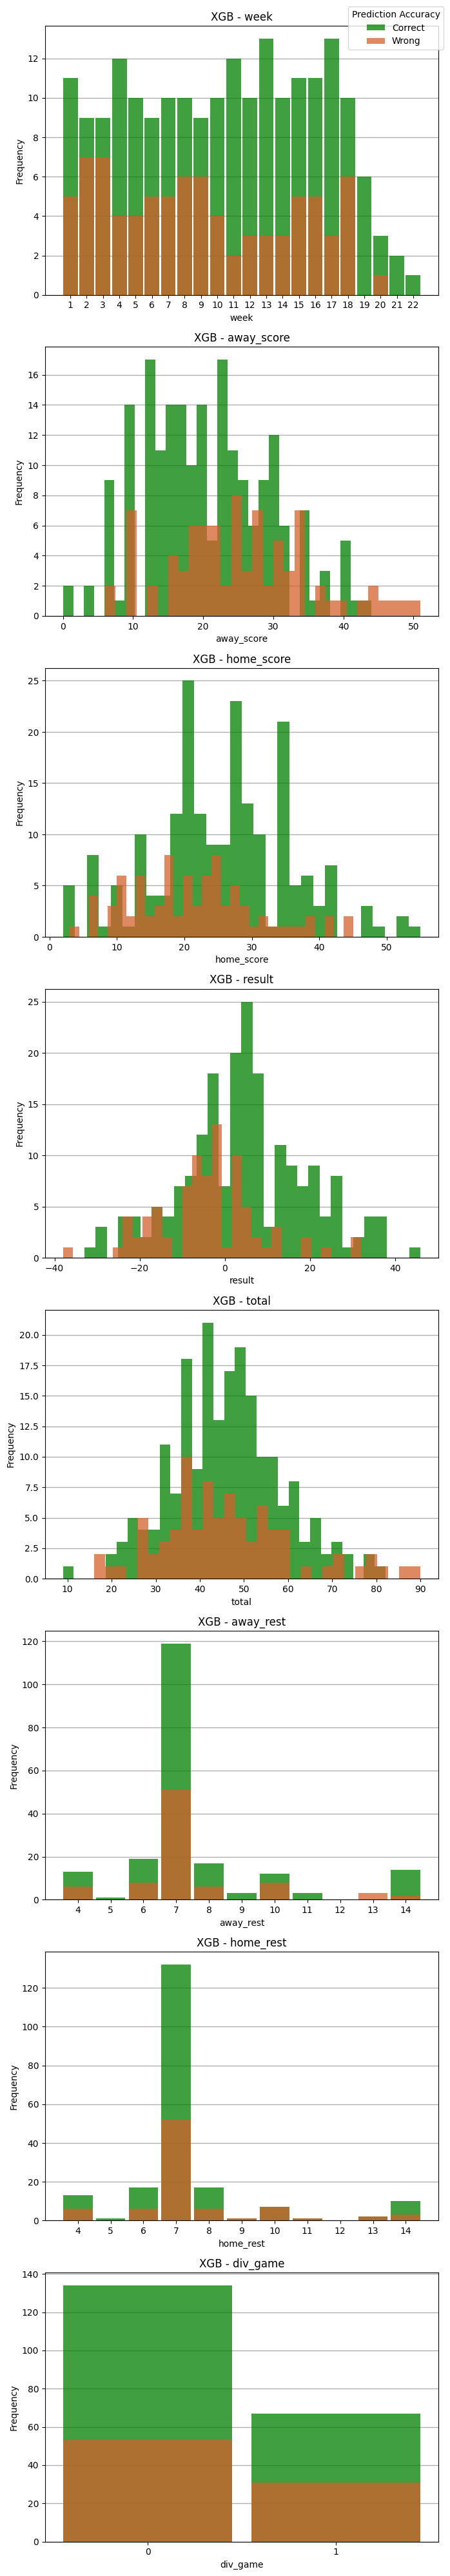

In [ ]:
plt.rcdefaults()
plt.clf()

df_xgb_right = df_verify.loc[~df_verify.index.isin(wrong_xgb), :]
df_xgb_wrong = df_verify.loc[wrong_xgb, :]

model_data = {
    "XGB": {"correct": df_xgb_right.copy(), "wrong": df_xgb_wrong.copy()},
}

numerical_columns = ["week", "away_score", "home_score", "result", "total",
"away_rest", "home_rest", "div_game"]

# Define custom bins for specific columns
custom_bins = {"week": range(1, week+2),
               "away_rest": range(min(df_verify["away_rest"]), max(df_verify["away_rest"])+2),
               "home_rest": range(min(df_verify["home_rest"]), max(df_verify["home_rest"])+2),
               "div_game": [0, 1, 2]}

num_rows = len(numerical_columns)
num_cols = len(model_data)

# Plot histograms
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(5 * num_cols + 2, 5 * num_rows), sharey="row")
axes = axes.reshape(num_rows, num_cols)

for row_idx, col in enumerate(numerical_columns):
    for col_idx, (model_name, data) in enumerate(model_data.items()):
        ax = axes[row_idx, col_idx]

        correct_predictions = data["correct"]
        wrong_predictions = data["wrong"]

        if col in custom_bins:
            bins = custom_bins[col]
            rwidth_value = 0.9
        else:
            bins = 30
            rwidth_value = 1.0

        ax.hist(correct_predictions[col], bins=bins, alpha=0.75, label="Correct", color="green", rwidth=rwidth_value, zorder=2)
        ax.hist(wrong_predictions[col], bins=bins, alpha=0.75, label="Wrong", color="#D3612C", rwidth=rwidth_value, zorder=2)

        ax.set_title(f"{model_name} - {col}")
        ax.set_xlabel(col)
        ax.grid(which="major", linestyle="-", linewidth=1, axis="y", zorder=0)
        
        # Only set y-label for the first column of each row
        if col_idx == 0:  
            ax.set_ylabel("Frequency")

        # Adjust ticks for custom bins
        if col in custom_bins:
            bin_edges = custom_bins[col]
            tick_positions = [(bin_edges[i] + bin_edges[i + 1]) / 2 for i in range(len(bin_edges) - 1)]
            ax.set_xticks(tick_positions)
            ax.set_xticklabels(bin_edges[:-1])
        
        
# Remove any empty subplots
for idx in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[idx])

fig.legend(["Correct", "Wrong"], 
           loc="upper right", 
           bbox_to_anchor=(1, 1), 
           fontsize=10, 
           title="Prediction Accuracy", 
           title_fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
results_full = np.concatenate(results)

total_home_wins = results_full.sum()
total_games = len(results_full)

print(f"Total games: {total_games}")
print(f"Total home wins: {total_home_wins}")
print(f"Accuracy if you predict home wins every game: {total_home_wins/total_games}")

Total games: 285
Total home wins: 156
Accuracy if you predict home wins every game: 0.5473684210526316


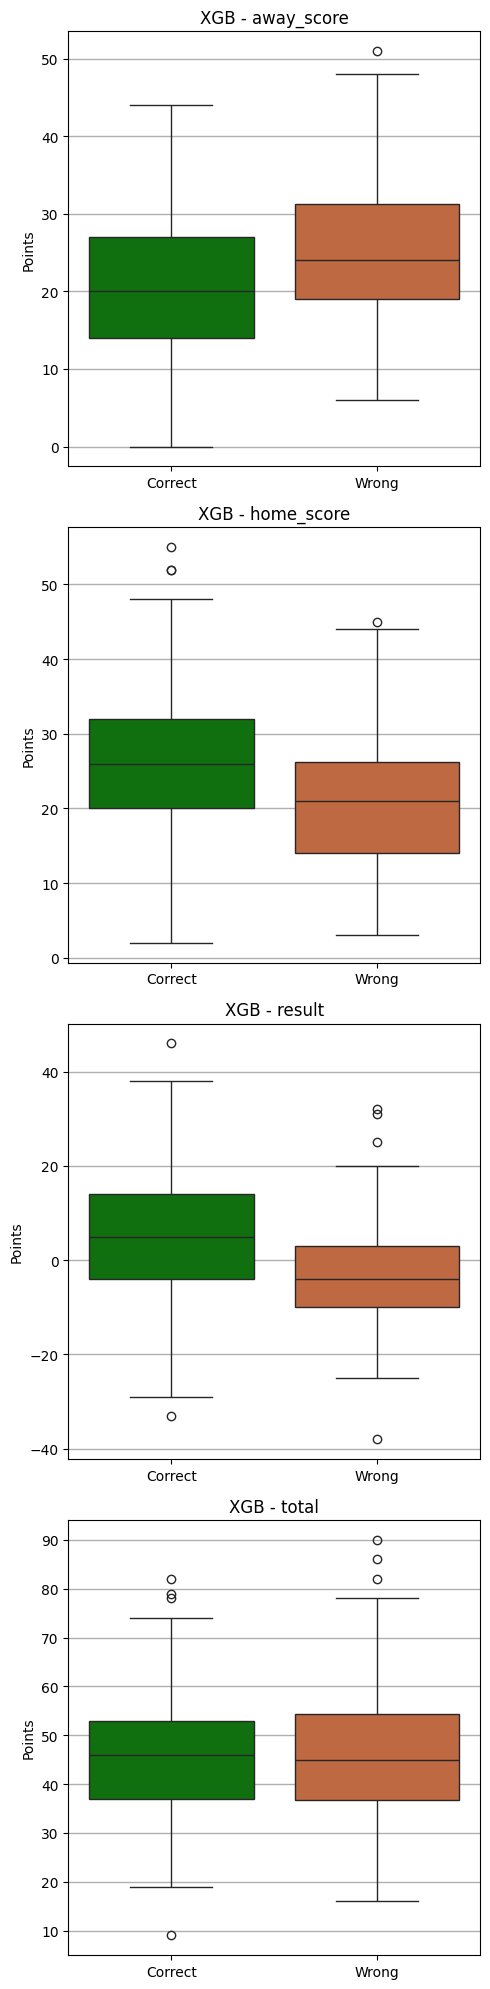

In [ ]:
numerical_columns_box = ["away_score", "home_score", "result", "total"]

# Separate the data
model_data = {
    "XGB": {"correct": df_xgb_right.copy(), "wrong": df_xgb_wrong.copy()},
}

num_rows = len(numerical_columns_box)
num_cols = len(model_data)

# Plot boxplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(5 * num_cols, 5 * num_rows), sharey="row")
axes = axes.reshape(num_rows, num_cols)


for row_idx, col in enumerate(numerical_columns_box):
    for col_idx, (model_name, data) in enumerate(model_data.items()):
        ax = axes[row_idx, col_idx]

        correct_predictions = data["correct"]
        wrong_predictions = data["wrong"]

        correct_predictions["Prediction"] = "Correct"
        wrong_predictions["Prediction"] = "Wrong"     

        combined_data = pd.concat([correct_predictions, wrong_predictions], ignore_index=True)
        sns.boxplot(x="Prediction", 
                    y=col, 
                    data=combined_data, 
                    ax=ax,
                    hue="Prediction",
                    palette={"Correct": "green", "Wrong": "#D3612C"},
                    dodge=False)
        
        ax.set_title(f"{model_name} - {col}")
        ax.set_xlabel("")
        ax.grid(which="major", linestyle="-", linewidth=1, axis="y", zorder=0)
        
        # Only set y-label for the first column of each row
        if col_idx == 0:  
            ax.set_ylabel("Points")
    
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

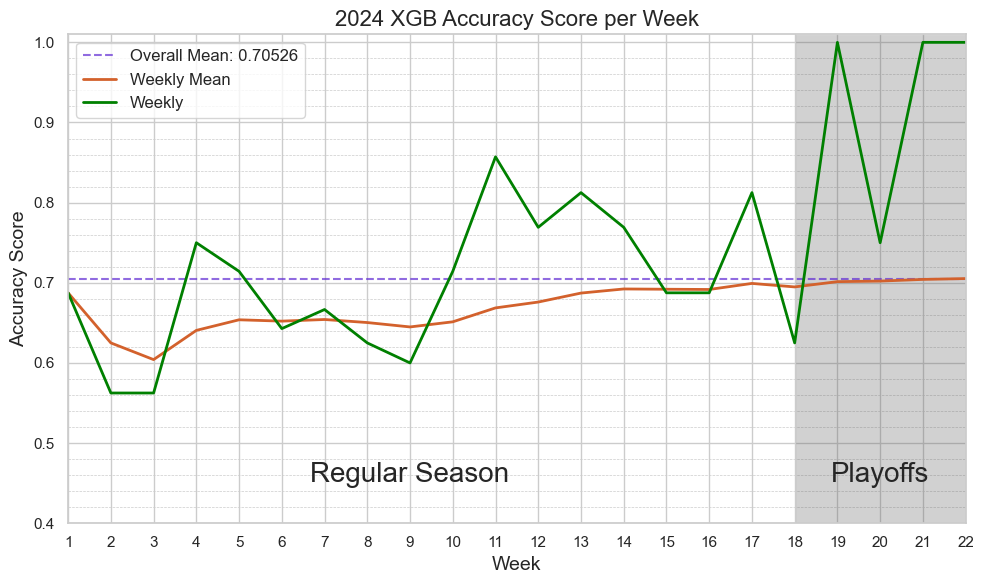

In [ ]:
# Create the plot
plt.clf()
plt.figure(figsize=(10, 6))  # Set the figure size
# Set the style to seaborn
sns.set(style="whitegrid")

x = range(1, len(mean_acc_xgb)+1)

mean_xgb = mean_acc_xgb_overall[-1]

plt.text(
    9,  # x position (in data coordinates)
    0.46,     # y position (in data coordinates)
    "Regular Season",
    ha="center",  # horizontal alignment
    va="center",  # vertical alignment
    fontsize=20,  # optional: size of text
    fontweight="normal"  # optional
)

plt.axvspan(18, 22, facecolor="#4B4B4B", alpha=0.25)
plt.text(
    20,  # x position (in data coordinates)
    0.46,     # y position (in data coordinates)
    "Playoffs",
    ha="center",  # horizontal alignment
    va="center",  # vertical alignment
    fontsize=20,  # optional: size of text
    fontweight="normal"  # optional
)

plt.axhline(mean_xgb, color="#612CD3", linestyle="--", linewidth=1.5, alpha=0.7,  label=f"Overall Mean: {mean_xgb:.5f}")

plt.plot(x, mean_acc_xgb_overall, label="Weekly Mean", linestyle="-", linewidth=2, color="#D3612C", markersize=8)

plt.plot(x, mean_acc_xgb, label="Weekly", linestyle="-", linewidth=2, color="green", markersize=8)

plt.title("2024 XGB Accuracy Score per Week", fontsize=16)
plt.xlabel("Week", fontsize=14)
plt.ylabel("Accuracy Score", fontsize=14)

plt.ylim(0.4, 1.01)
plt.yticks(np.arange(0.4, 1.1, 0.1))
plt.gca().set_yticks(np.arange(0.4, 1.05, 0.05), minor=True) 

plt.xlim(1, week)
plt.xticks(np.arange(1, week+1, 1))

plt.minorticks_on()

plt.grid(which="major", linestyle="-", linewidth=1)
plt.grid(which="minor", axis="y", linestyle="--", linewidth=0.5)
plt.legend(fontsize=12)

plt.grid(True)

plt.tight_layout()
plt.show()